In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle

In [2]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer,one_hot

import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/train_en.tsv', sep='\t')

In [6]:
def find_non_numeric(column):
    non_numeric_values = column[~column.apply(lambda x: str(x).isdigit())]
    return non_numeric_values

In [7]:
non_numeric_AG = find_non_numeric(data['AG'])

In [8]:
non_numeric_AG = find_non_numeric(data['AG'])

In [9]:
data = data[data['AG'].apply(lambda x: str(x).isdigit())]

In [10]:
data['AG'] = data['AG'].astype(int)

<ipython-input-10-8b9662f95830>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AG'] = data['AG'].astype(int)


In [11]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove special characters, numbers, and punctuations (except for hashtags and @mentions)
    text = re.sub("[^a-zA-Z#@]", " ", text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    exclude =string.punctuation
    words = [word for word in words if word not in exclude]

    # Lemmatize words based on POS tags
    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(words)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text


In [12]:
data['text'] = data['text'].apply(preprocess_text)

# **TASK-1**

In [13]:
X = data['text']
y = data['HS']

In [14]:
voc_size=5000

In [15]:
onehot_repr = [one_hot(words,voc_size)for words in X]

In [16]:
embedded_doc = pad_sequences(onehot_repr,padding='pre',maxlen=40)
print(embedded_doc)

[[   0    0    0 ...  442   95 4795]
 [   0    0    0 ... 2041 2728 3928]
 [   0    0    0 ... 2914 1683  178]
 ...
 [   0    0    0 ... 2017 4193 2917]
 [   0    0    0 ... 3822 4971 4067]
 [   0    0    0 ... 1677 4697  502]]


In [17]:
from keras.callbacks import ModelCheckpoint

In [18]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.add(LSTM(100, input_shape=(30, embedding_vector_features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 40)          200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [21]:


# Train the model and save the history
history = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=5, batch_size=64)



Epoch 1/5
113/113 [==============================] - 17s 126ms/step - loss: 0.6123 - accuracy: 0.6556 - val_loss: 0.5299 - val_accuracy: 0.7533
Epoch 2/5
113/113 [==============================] - 9s 83ms/step - loss: 0.4187 - accuracy: 0.8122 - val_loss: 0.5252 - val_accuracy: 0.7539
Epoch 3/5
113/113 [==============================] - 7s 66ms/step - loss: 0.3424 - accuracy: 0.8533 - val_loss: 0.5854 - val_accuracy: 0.7317
Epoch 4/5
113/113 [==============================] - 7s 64ms/step - loss: 0.2850 - accuracy: 0.8818 - val_loss: 0.6512 - val_accuracy: 0.7156
Epoch 5/5
113/113 [==============================] - 10s 92ms/step - loss: 0.2385 - accuracy: 0.9046 - val_loss: 0.7492 - val_accuracy: 0.7028


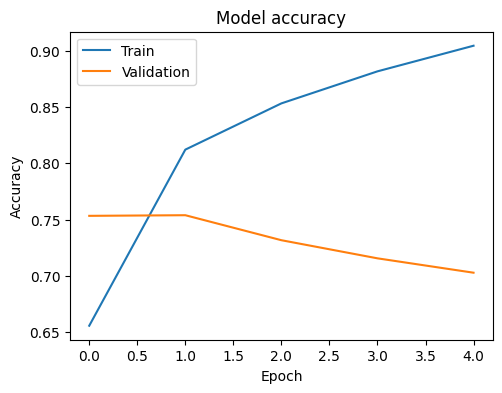

In [22]:


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.show()


57/57 [==============================] - 1s 14ms/step - loss: 0.7492 - accuracy: 0.7028
Best Model Accuracy: 0.7027778029441833
57/57 [==============================] - 1s 9ms/step
Confusion Matrix:
 [[779 269]
 [266 486]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.74      1048
           1       0.64      0.65      0.64       752

    accuracy                           0.70      1800
   macro avg       0.69      0.69      0.69      1800
weighted avg       0.70      0.70      0.70      1800



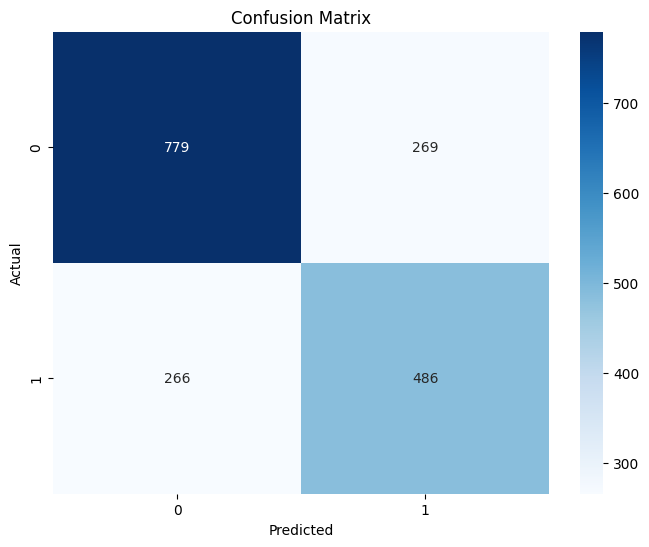

In [23]:
loss, accuracy = model.evaluate(X_test1, y_test1)
print(f'Best Model Accuracy: {accuracy}')

# Get predictions
y_pred_prob = model.predict(X_test1)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Create and save confusion matrix
cm = confusion_matrix(y_test1, y_pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
print("Confusion Matrix:\n", cm)

# Print classification report
print("Classification Report:\n", classification_report(y_test1, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()





# **TASK-2**

**PART-B**

In [24]:
X = data['text']
y = data['AG']

In [25]:
voc_size=5000

In [26]:
onehot_repr = [one_hot(words,voc_size)for words in X]

In [27]:
embedded_doc = pad_sequences(onehot_repr,padding='pre',maxlen=30)
print(embedded_doc)

[[   0    0    0 ...  442   95 4795]
 [   0    0    0 ... 2041 2728 3928]
 [   0    0    0 ... 2914 1683  178]
 ...
 [   0    0    0 ... 2017 4193 2917]
 [   0    0    0 ... 3822 4971 4067]
 [   0    0    0 ... 1677 4697  502]]


In [28]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.add(LSTM(100, input_shape=(30, embedding_vector_features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 40)          200000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [29]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [30]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [31]:
# Train the model and save the history
history = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=5, batch_size=64)

Epoch 1/5
113/113 [==============================] - 9s 56ms/step - loss: 0.4477 - accuracy: 0.8257 - val_loss: 0.3931 - val_accuracy: 0.8344
Epoch 2/5
113/113 [==============================] - 5s 47ms/step - loss: 0.3307 - accuracy: 0.8587 - val_loss: 0.3822 - val_accuracy: 0.8406
Epoch 3/5
113/113 [==============================] - 7s 63ms/step - loss: 0.2546 - accuracy: 0.8965 - val_loss: 0.4167 - val_accuracy: 0.8250
Epoch 4/5
113/113 [==============================] - 5s 41ms/step - loss: 0.2014 - accuracy: 0.9211 - val_loss: 0.4968 - val_accuracy: 0.8272
Epoch 5/5
113/113 [==============================] - 6s 50ms/step - loss: 0.1664 - accuracy: 0.9354 - val_loss: 0.6272 - val_accuracy: 0.8228


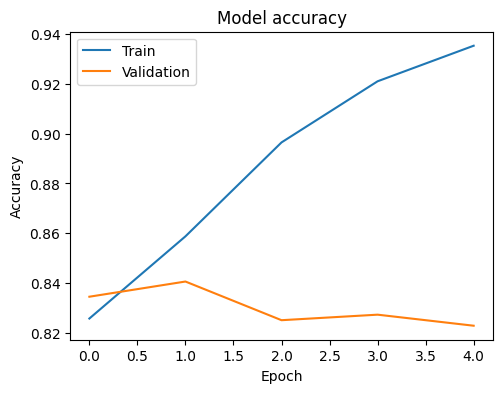

In [32]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')



plt.show()

57/57 [==============================] - 1s 10ms/step - loss: 0.6272 - accuracy: 0.8228
Best Model Accuracy: 0.8227777481079102
57/57 [==============================] - 1s 9ms/step
Confusion Matrix:
 [[1395   94]
 [ 225   86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1489
           1       0.48      0.28      0.35       311

    accuracy                           0.82      1800
   macro avg       0.67      0.61      0.62      1800
weighted avg       0.79      0.82      0.80      1800



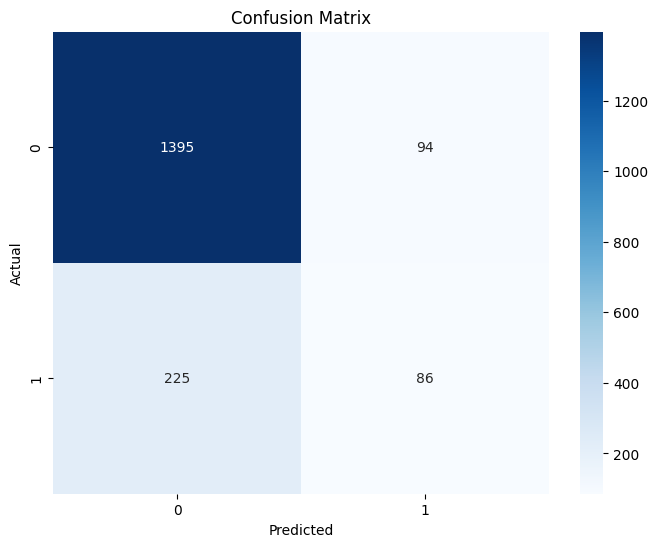

In [33]:
loss, accuracy = model.evaluate(X_test1, y_test1)
print(f'Best Model Accuracy: {accuracy}')

# Get predictions
y_pred_prob = model.predict(X_test1)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Create and save confusion matrix
cm = confusion_matrix(y_test1, y_pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
print("Confusion Matrix:\n", cm)

# Print classification report
print("Classification Report:\n", classification_report(y_test1, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**PART-A**

In [34]:
X = data['text']
y = data['TR']

In [35]:
voc_size=5000

In [36]:
onehot_repr = [one_hot(words,voc_size)for words in X]

In [37]:
embedded_doc = pad_sequences(onehot_repr,padding='pre',maxlen=30)
print(embedded_doc)

[[   0    0    0 ...  442   95 4795]
 [   0    0    0 ... 2041 2728 3928]
 [   0    0    0 ... 2914 1683  178]
 ...
 [   0    0    0 ... 2017 4193 2917]
 [   0    0    0 ... 3822 4971 4067]
 [   0    0    0 ... 1677 4697  502]]


In [38]:
embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.add(LSTM(100, input_shape=(30, embedding_vector_features)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 40)          200000    
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [39]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [41]:
# Train the model and save the history
history = model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=5, batch_size=64)

Epoch 1/5
113/113 [==============================] - 7s 46ms/step - loss: 0.4064 - accuracy: 0.8523 - val_loss: 0.3077 - val_accuracy: 0.8739
Epoch 2/5
113/113 [==============================] - 7s 64ms/step - loss: 0.2544 - accuracy: 0.8869 - val_loss: 0.2735 - val_accuracy: 0.8872
Epoch 3/5
113/113 [==============================] - 5s 48ms/step - loss: 0.1972 - accuracy: 0.9151 - val_loss: 0.3289 - val_accuracy: 0.8817
Epoch 4/5
113/113 [==============================] - 6s 50ms/step - loss: 0.1551 - accuracy: 0.9374 - val_loss: 0.3586 - val_accuracy: 0.8722
Epoch 5/5
113/113 [==============================] - 6s 55ms/step - loss: 0.1225 - accuracy: 0.9550 - val_loss: 0.3885 - val_accuracy: 0.8633


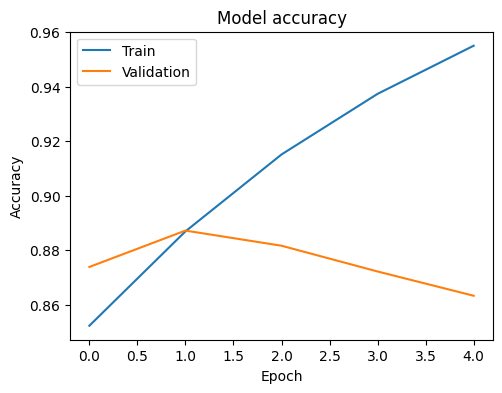

In [42]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.show()

57/57 [==============================] - 0s 8ms/step - loss: 0.3885 - accuracy: 0.8633
Best Model Accuracy: 0.8633333444595337
57/57 [==============================] - 1s 7ms/step
Confusion Matrix:
 [[1414  109]
 [ 137  140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      1523
           1       0.56      0.51      0.53       277

    accuracy                           0.86      1800
   macro avg       0.74      0.72      0.73      1800
weighted avg       0.86      0.86      0.86      1800



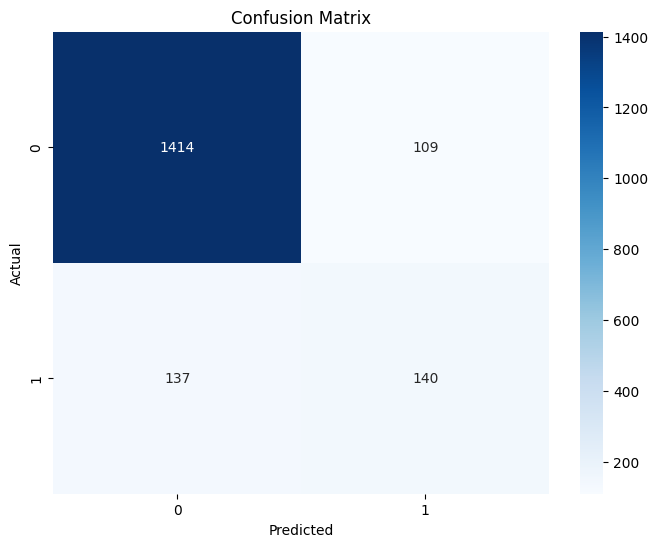

In [43]:
loss, accuracy = model.evaluate(X_test1, y_test1)
print(f'Best Model Accuracy: {accuracy}')

# Get predictions
y_pred_prob = model.predict(X_test1)
# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Create and save confusion matrix
cm = confusion_matrix(y_test1, y_pred)
np.savetxt("confusion_matrix.csv", cm, delimiter=",")
print("Confusion Matrix:\n", cm)

# Print classification report
print("Classification Report:\n", classification_report(y_test1, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()